In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import netket as nk

import dynamics as dn

In [15]:
F1 = dn.frequencies.Quadratic(0.5, 8, 0)
F2 = dn.frequencies.Linear(0.5, 0, 9)

F = F1.append(F2)

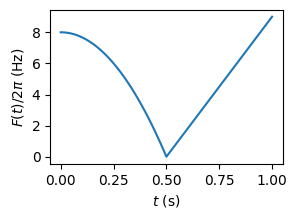

In [16]:
ax = F.plot()
plt.show()

In [17]:
import netket as nk

x = nk.operator.spin.sigmax(nk.hilbert.Spin(1 / 2), 0)
y = nk.operator.spin.sigmay(nk.hilbert.Spin(1 / 2), 0)

In [18]:
H = dn.operators.hamiltonian.TimeDependentHamiltonian((x, y), (F1, F2))

<Axes: xlabel='$t$ (s)', ylabel='$F(t)/2\\pi$ (Hz)'>

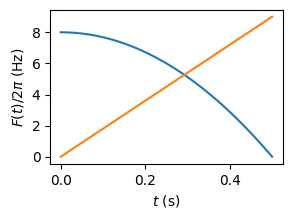

In [20]:
H.plot()

In [23]:
H(0.5).to_dense()/2/np.pi

array([[0.+0.j, 0.-9.j],
       [0.+9.j, 0.+0.j]])

# Exact evolution driver

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import netket as nk

import dynamics as dn
from netket.operator.spin import sigmax,sigmaz

In [7]:
T = 10.0
N = 10
hi = nk.hilbert.Spin(1/2,N)
H = dn.operators.hamiltonian.TimeDependentHamiltonian(
    [-dn.operators.Hx(hi,N), -dn.operators.Hzz(hi, [(i,(i+1)%N) for i in range(N)])],
    [dn.frequencies.Linear(T,1,0), dn.frequencies.Linear(T,0,1)],
)
psi0 = np.ones(hi.n_states, dtype=complex)
psi0 = psi0/np.linalg.norm(psi0)


In [8]:
te = dn.driver.EactEvolution(
    H, psi0, nk.experimental.dynamics.RK4(1e-2), t0=0.
)


In [9]:
te.run(
    T, out='test/exact_evolution/', obs={'m':sum([sigmaz(hi,i) for i in range(N)])/N, 'x':sum([sigmax(hi,i) for i in range(N)])/N}
)

100%|██████████| 10.0/10.0 [00:16<00:00, 1.66s/it, n=1000, Generator=-4.852e+01+7.063e-16j ± 0.000e+00 [σ²=2.354e+03]]


(JsonLog('test/exact_evolution/exact', mode=write, autoflush_cost=0.005)
   Runtime cost:
   	Log:    0.0810546875
   	Params: 0.0,)

In [10]:
import json
log = json.load(open('test/exact_evolution/exact.log'))

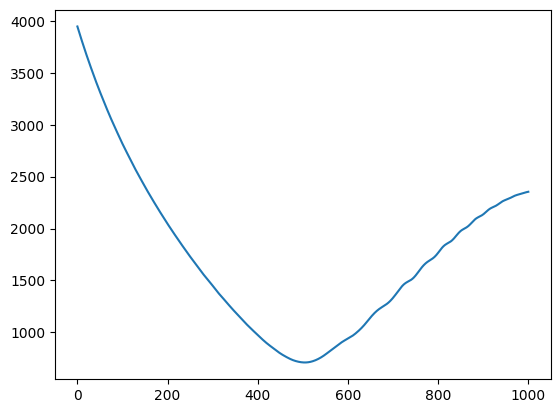

In [11]:
plt.plot(log['Generator']['Variance'])

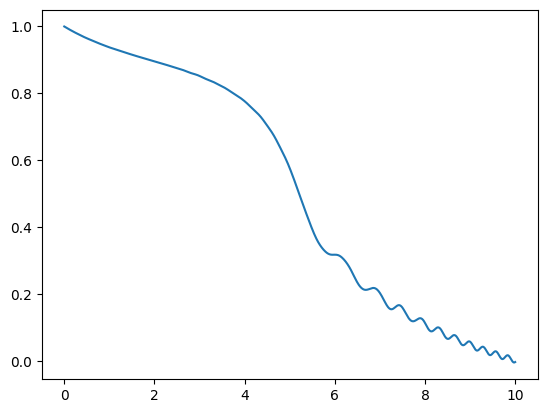

In [15]:
plt.plot(log['x']['iters'], log['x']['value']['real'])